In [1]:
%matplotlib inline
import pandas as pd
import numpy as np


#Read the full data from csv
read_large = pd.read_csv('CrimeDataSampled.csv',low_memory=False)
print("Size of the dataset is:")
read_large.shape


Size of the dataset is:


(16000, 22)

In [2]:
print("First 5 records of the dataset")
read_large.head()

First 5 records of the dataset


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3479834,HK552420,08/12/2004 12:00:00 AM,105XX S INDIANAPOLIS AVE,0810,THEFT,OVER $500,CONSTRUCTION SITE,False,False,...,10.0,52.0,06,1204716.0,1835791.0,2004,02/28/2018 03:56:25 PM,41.704078,-87.525971,"(41.70407777, -87.525971128)"
1,8701246,HV377524,07/11/2012 01:15:00 PM,064XX S WOLCOTT AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,15.0,67.0,18,1164788.0,1862061.0,2012,02/04/2016 06:33:39 AM,41.777101,-87.671440,"(41.777100774, -87.671439999)"
2,11473873,JB471566,10/11/2018 03:15:00 PM,0000X N STATE ST,0560,ASSAULT,SIMPLE,DRUG STORE,False,False,...,42.0,32.0,08A,1176365.0,1900502.0,2018,10/18/2018 04:27:18 PM,41.882334,-87.627842,"(41.88233367, -87.627841791)"
3,4636116,HM233432,03/14/2006 07:00:00 PM,031XX S LAWNDALE AVE,0498,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET S...,APARTMENT,False,True,...,22.0,30.0,04B,1152204.0,1883512.0,2006,02/28/2018 03:56:25 PM,41.836222,-87.717009,"(41.836221891, -87.717009206)"
4,3430477,HK496014,07/14/2004 08:00:00 PM,063XX S CALUMET AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,PARKING LOT/GARAGE(NON.RESID.),False,False,...,20.0,69.0,04A,1179552.0,1862775.0,2004,02/28/2018 03:56:25 PM,41.778735,-87.617294,"(41.778735481, -87.617293946)"


In [3]:
#Cleaning data by filling the null values
read_large['Ward'].fillna(read_large['Ward'].mode()[0], inplace=True)
read_large.columns[read_large.isnull().any()]

#Converting Primary Types into New Primary Types
rowcount=len(read_large)
for i in range(rowcount):
    if (read_large['Primary Type'][i] == 'CRIM SEXUAL ASSAULT' or read_large['Primary Type'][i]=='ASSAULT'or read_large['Primary Type'][i]=='PROSTITUTION' or read_large['Primary Type'][i]=='SEX OFFENSE'):
         read_large.at[i, 'Primary Type'] = 'SEX'
    elif(read_large['Primary Type'][i] == 'MOTOR VEHICLE THEFT'):
        read_large.at[i, 'Primary Type'] = 'MVT'
    elif(read_large['Primary Type'][i] == 'GAMBLING' or read_large['Primary Type'][i]=='INTERFERENCE WITH PUBLIC OFFICER' or read_large['Primary Type'][i]=='INTIMIDATION' or read_large['Primary Type'][i]=='LIQUOR LAW VIOLATION' or read_large['Primary Type'][i]=='OBSCENITY' or read_large['Primary Type'][i]=='NON-CRIMINAL' or read_large['Primary Type'][i]=='PUBLIC PEACE VIOLATION' or read_large['Primary Type'][i]=='PUBLIC INDECENCY' or read_large['Primary Type'][i]=='STALKING' or read_large['Primary Type'][i]=='NON CRIMINAL'):
          read_large.at[i, 'Primary Type'] = 'NONVIO'
    elif(read_large['Primary Type'][i] == 'CRIMINAL DAMAGE'):
        read_large.at[i, 'Primary Type'] = 'DAMAGE'
    elif(read_large['Primary Type'][i] == 'CRIMINAL TRESPASS'):
        read_large.at[i, 'Primary Type'] = 'TRESPASS'
    elif(read_large['Primary Type'][i] == 'NARCOTICS' or read_large['Primary Type'][i]=='OTHER NARCOTIC VIOLATION'):
         read_large.at[i, 'Primary Type'] = 'DRUG '
    elif(read_large['Primary Type'][i] == 'DECEPTIVE PRACTICE'):
        read_large.at[i, 'Primary Type']='FRAUD'
    elif(read_large['Primary Type'][i]=='OTHER OFFENSE' or read_large['Primary Type'][i]=='ARSON' or read_large['Primary Type'][i]=='BATTERY' or read_large['Primary Type'][i]=='DOMESTIC VIOLENCE' or read_large['Primary Type'][i]=='HOMICIDE' or read_large['Primary Type'][i]=='RITUALISM' or read_large['Primary Type'][i]=='CONCEALED CARRY LICENSE VIOLATION'):
        read_large.at[i, 'Primary Type']='OTHER'
    elif(read_large['Primary Type'][i]=='KIDNAPPING' or read_large['Primary Type'][i]=='WEAPONS VIOLATION' or read_large['Primary Type'][i]=='OFFENSE INVOLVING CHILDREN'):
        read_large.at[i, 'Primary Type']='VIO'
    elif(read_large['Primary Type'][i]=='THEFT' or read_large['Primary Type'][i]=='ROBBERY' or read_large['Primary Type'][i]=='BURGLARY'):
        read_large.at[i, 'Primary Type']='THEFT'
    else:
         read_large.at[i, 'Primary Type']='UNKNOWN'


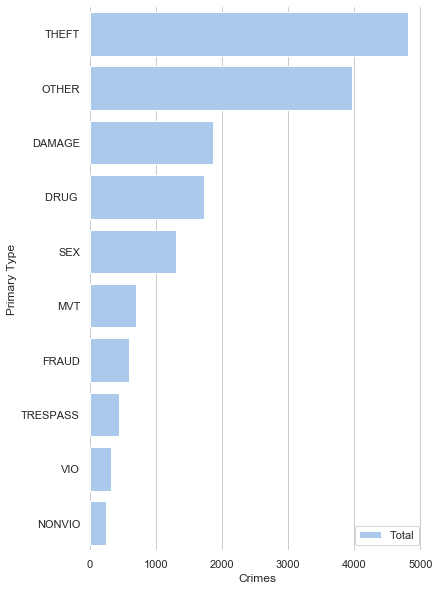

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
crime_count = pd.DataFrame(read_large.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Primary Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [5]:
col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = read_large[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['SEX','MVT','NONVIO','DAMAGE','TRESPASS','DRUG','FRAUD','OTHER','VIO','THEFT'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
0,08/12/2004 12:00:00 AM,THEFT,False,False,4.0,1204716.0,1835791.0
2,10/11/2018 03:15:00 PM,SEX,False,False,1.0,1176365.0,1900502.0
3,03/14/2006 07:00:00 PM,OTHER,False,True,10.0,1152204.0,1883512.0
4,07/14/2004 08:00:00 PM,SEX,False,False,3.0,1179552.0,1862775.0
5,04/17/2007 03:00:00 PM,THEFT,False,False,10.0,1156348.0,1886588.0


C:\Users\15714\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


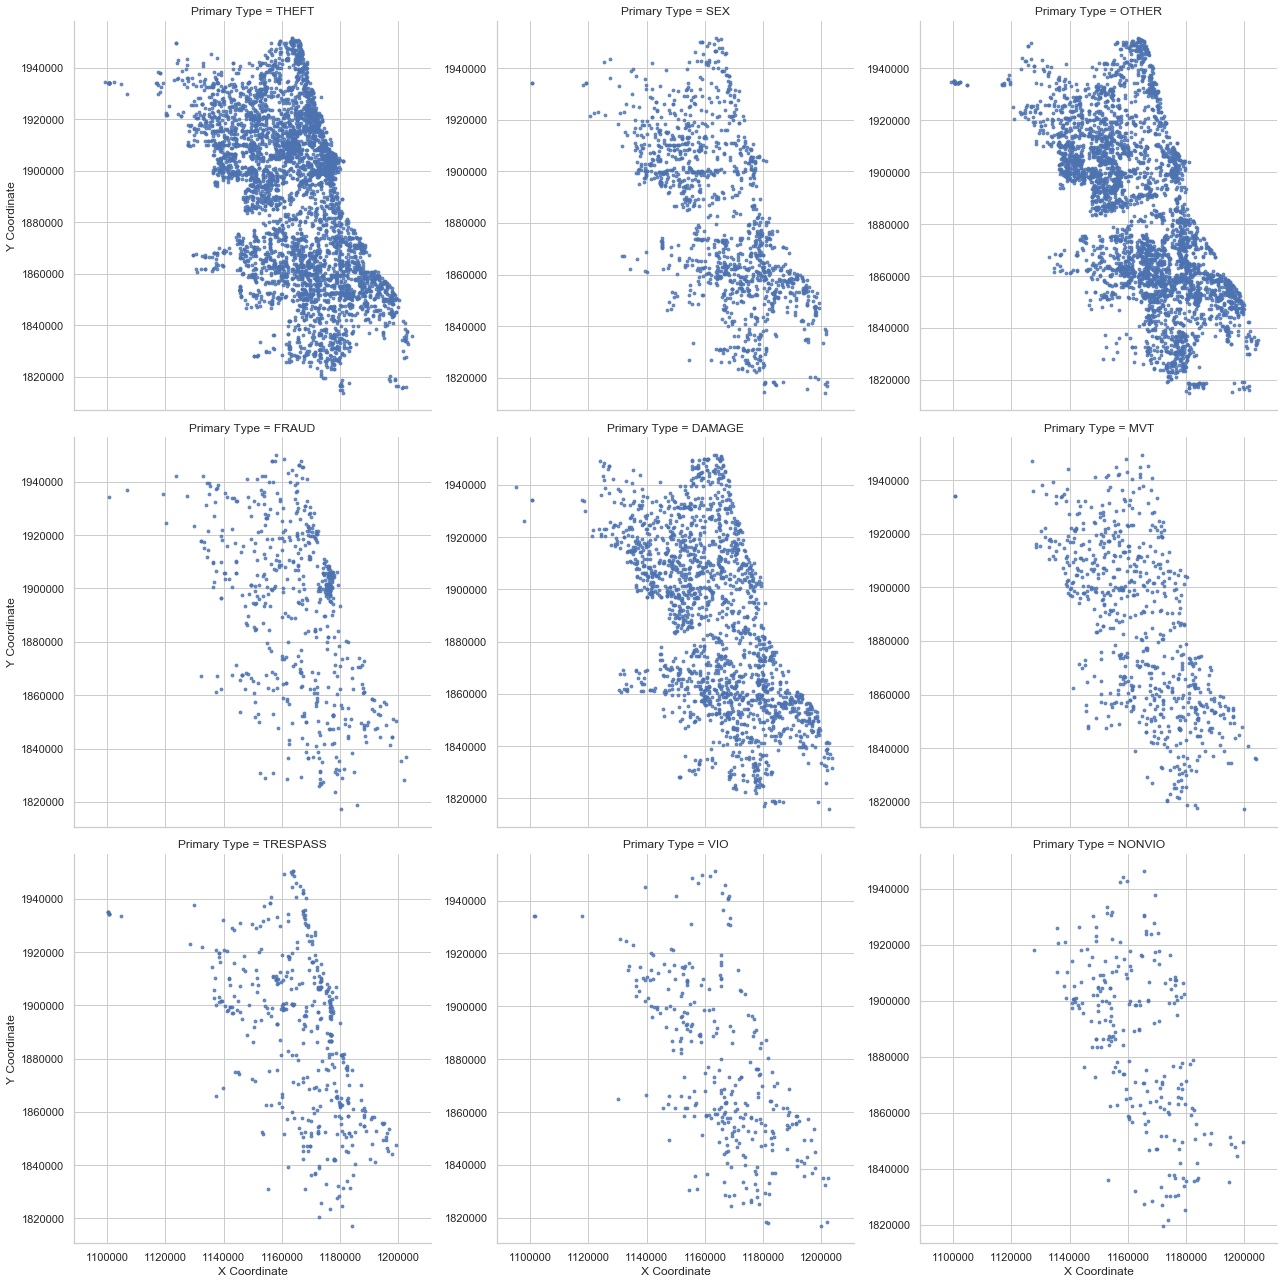

In [6]:
import seaborn as sns
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes, 
               col_wrap=3, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 8})

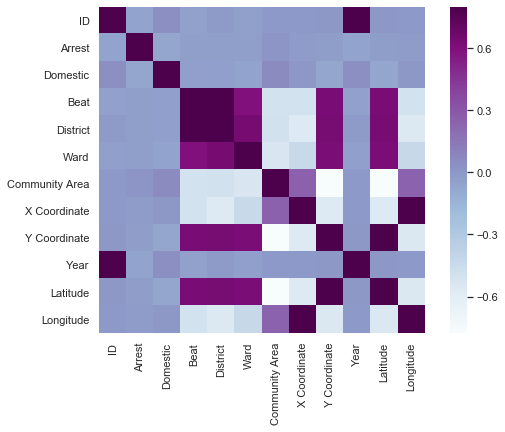

In [7]:

matrix = read_large.corr() 
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [8]:
#Dropping the columns not needed for prediction
df_large=read_large.drop(['ID','Case Number','Latitude','Longitude','Block','IUCR','FBI Code','X Coordinate','Y Coordinate','Updated On','Latitude','Longitude','Location','Location Description','Description'],axis=1)
#Converting Date to datatime format
df_large['Date']=pd.to_datetime(df_large['Date'])
#Splitting the date into month and day
df_large[['Month','Day']] = df_large.Date.apply(lambda x: pd.Series(x.strftime("%m,%d").split(",")))

#Check if dataset has null values
df_large.columns[df_large.isnull().any()]

#Converting Categorical Columns to Numeric
df_large[["Arrest", "Domestic"]] *= 1

#Cleaning the Community Area Column
df_large['Community Area'].fillna(df_large['Community Area'].mode()[0], inplace=True)
df_large.columns[df_large.isnull().any()]

#Dropping the Columns
df_large=df_large[['Date','Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Year', 'Month', 'Day','Primary Type']]
df_large.drop("Date", axis=1, inplace=True)

print("")
print("The Cleaned Large Dataset:")
df_large.head()


The Cleaned Large Dataset:


,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Primary Type
0,0,0,432,4.0,10.0,52.0,2004,08,12,THEFT
1,1,0,726,7.0,15.0,67.0,2012,07,11,DRUG
2,0,0,112,1.0,42.0,32.0,2018,10,11,SEX
3,0,1,1032,10.0,22.0,30.0,2006,03,14,OTHER
4,0,0,312,3.0,20.0,69.0,2004,07,14,SEX


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df_large.values[:,:-1]
Y=df_large.values[:,-1]
X=StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clfgini=DecisionTreeClassifier(criterion='gini')
clfgini=clfgini.fit(X_train,y_train)
y_pred = clfgini.predict(X_test)
from sklearn import metrics
print("Accuracy using gini:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Decision Tree Classifier using gini:")
print(classification_report(y_test, y_pred))

Accuracy using gini: 29.4375
The Report for Decision Tree Classifier using gini:
              precision    recall  f1-score   support

      DAMAGE       0.14      0.15      0.15       369
       DRUG        0.50      0.46      0.48       338
       FRAUD       0.04      0.03      0.04       143
         MVT       0.05      0.04      0.05       157
      NONVIO       0.05      0.07      0.06        44
       OTHER       0.38      0.38      0.38       758
         SEX       0.09      0.09      0.09       275
       THEFT       0.42      0.41      0.42       966
    TRESPASS       0.09      0.10      0.09        94
         VIO       0.03      0.04      0.03        56

    accuracy                           0.29      3200
   macro avg       0.18      0.18      0.18      3200
weighted avg       0.30      0.29      0.30      3200



In [11]:
SEED = 1
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6,7,8,9,10],
'min_samples_leaf': [0.02,0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,scoring='accuracy',cv=5,n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 7, 'max_features': 0.4, 'min_samples_leaf': 0.02}


In [12]:
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
y_pred = best_model.predict(X_test)

from sklearn import metrics
print("Accuracy for Decision Trees using best model:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Decision Tree Classifier using best model:")
print(classification_report(y_test, y_pred))

Accuracy for Decision Trees using best model: 46.15625
The Report for Decision Tree Classifier using best model:
              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       369
       DRUG        0.42      1.00      0.59       338
       FRAUD       0.00      0.00      0.00       143
         MVT       0.00      0.00      0.00       157
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.72      0.39      0.51       758
         SEX       0.00      0.00      0.00       275
       THEFT       0.42      0.87      0.57       966
    TRESPASS       0.00      0.00      0.00        94
         VIO       0.00      0.00      0.00        56

    accuracy                           0.46      3200
   macro avg       0.16      0.23      0.17      3200
weighted avg       0.34      0.46      0.36      3200



C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[50,100,150,200],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred=model1.predict(X_test)

from sklearn import metrics
print("Accuracy for Random Forest using best model:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Random Forest Classifier using best model:")
print(classification_report(y_test, y_pred))


C:\Users\15714\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 123}
Accuracy for Random Forest using best model: 45.375
The Report for Random Forest Classifier using best model:
              precision    recall  f1-score   support

      DAMAGE       0.18      0.04      0.07       369
       DRUG        0.47      0.91      0.62       338
       FRAUD       0.17      0.01      0.01       143
         MVT       0.00      0.00      0.00       157
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.56      0.48      0.51       758
         SEX       0.11      0.01      0.01       275
       THEFT       0.43      0.79      0.56       966
    TRESPASS       0.17      0.03      0.05        94
         VIO       0.00      0.00      0.00        56

    accuracy                           0.45      3200
   macro avg       0.21      0.23      0.18      3200
weighted avg       0.35      0.45 

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1_knn = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1_knn.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1_knn.best_params_)
#Prediction
y_pred=model1_knn.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for K Neighbors Classifier using best model:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for K Neighbors Classifier using best model:")
print(classification_report(y_test, y_pred))

C:\Users\15714\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy for K Neighbors Classifier using best model: 40.09375
The Report for K Neighbors Classifier using best model:
              precision    recall  f1-score   support

      DAMAGE       0.12      0.09      0.10       369
       DRUG        0.45      0.89      0.60       338
       FRAUD       0.05      0.01      0.01       143
         MVT       0.04      0.01      0.01       157
      NONVIO       0.67      0.05      0.09        44
       OTHER       0.46      0.48      0.47       758
         SEX       0.12      0.02      0.04       275
       THEFT       0.42      0.59      0.49       966
    TRESPASS       0.25      0.03      0.06        94
         VIO       0.00      0.00      0.00        56

    accuracy                           0.40      3200
   macro avg       0.26      0.22      0.19      3200
weighted avg       0.33      0.40      0.34      3200



In [15]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for Naive Bayes Classifier:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Naive Bayes Classifier:")
print(classification_report(y_test, y_pred))

Accuracy for Naive Bayes Classifier: 23.84375
The Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       369
       DRUG        0.43      0.96      0.59       338
       FRAUD       0.00      0.00      0.00       143
         MVT       0.07      0.90      0.13       157
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.72      0.39      0.51       758
         SEX       0.00      0.00      0.00       275
       THEFT       0.00      0.00      0.00       966
    TRESPASS       0.00      0.00      0.00        94
         VIO       0.00      0.00      0.00        56

    accuracy                           0.24      3200
   macro avg       0.12      0.23      0.12      3200
weighted avg       0.22      0.24      0.19      3200



C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1_svm = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1_svm.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1_svm.best_params_)
#Prediction
y_pred=model1_svm.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for SVM using best model:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for SVM using best model:")
print(classification_report(y_test, y_pred))

C:\Users\15714\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\15714\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf'}
Accuracy for SVM using best model: 46.1875
The Report for SVM using best model:
              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       369
       DRUG        0.44      0.97      0.60       338
       FRAUD       0.00      0.00      0.00       143
         MVT       0.00      0.00      0.00       157
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.70      0.39      0.50       758
         SEX       0.00      0.00      0.00       275
       THEFT       0.42      0.88      0.57       966
    TRESPASS       0.00      0.00      0.00        94
         VIO       0.00      0.00      0.00        56

    accuracy                           0.46      3200
   macro avg       0.16      0.22      0.17      3200
weighted avg       0.34      0.46      0.36      3200



C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#K Fold Validation
from sklearn.model_selection import KFold
# K Fold Cross Validation
kfold=KFold(n_splits=5, shuffle=True)
X=df_large.values[:,:-1]
Y=df_large.values[:,-1]
# enumerate splits
for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test] 
    y_train, y_test = Y[train], Y[test]

In [18]:
from sklearn.tree import DecisionTreeClassifier
clfgini=DecisionTreeClassifier(criterion='gini')
clfgini=clfgini.fit(X_train,y_train)
y_pred = clfgini.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for Decision Tree Classifier using gini for K fold Validation:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Decision Tree Classifier using gini for K fold Validation:")
print(classification_report(y_test, y_pred))

Accuracy for Decision Tree Classifier using gini for K fold Validation: 30.125
The Report for Decision Tree Classifier using gini for K fold Validation:
              precision    recall  f1-score   support

      DAMAGE       0.14      0.14      0.14       364
       DRUG        0.51      0.49      0.50       358
       FRAUD       0.05      0.07      0.06       116
         MVT       0.07      0.08      0.08       138
      NONVIO       0.04      0.05      0.04        44
       OTHER       0.38      0.37      0.37       783
         SEX       0.12      0.13      0.12       267
       THEFT       0.42      0.40      0.41       983
    TRESPASS       0.04      0.04      0.04        77
         VIO       0.02      0.03      0.03        70

    accuracy                           0.30      3200
   macro avg       0.18      0.18      0.18      3200
weighted avg       0.31      0.30      0.31      3200



In [19]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.04}


In [20]:
best_model = grid_dt.best_estimator_
y_pred = best_model.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for Decision Tree Classifier best model for K fold Validation:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Decision Tree Classifier best model for K fold Validation:")
print(classification_report(y_test, y_pred))

Accuracy for Decision Tree Classifier best model for K fold Validation: 47.0625
The Report for Decision Tree Classifier best model for K fold Validation:


C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       364
       DRUG        0.42      0.99      0.60       358
       FRAUD       0.00      0.00      0.00       116
         MVT       0.00      0.00      0.00       138
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.72      0.38      0.49       783
         SEX       0.00      0.00      0.00       267
       THEFT       0.44      0.87      0.58       983
    TRESPASS       0.00      0.00      0.00        77
         VIO       0.00      0.00      0.00        70

    accuracy                           0.47      3200
   macro avg       0.16      0.22      0.17      3200
weighted avg       0.36      0.47      0.37      3200



In [21]:
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[100,50],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for Random Forest Classifier best model for K fold Validation:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Random Forest Classifier best model for K fold Validation:")
print(classification_report(y_test, y_pred))

C:\Users\15714\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 123}
Accuracy for Random Forest Classifier best model for K fold Validation: 45.5
The Report for Random Forest Classifier best model for K fold Validation:
              precision    recall  f1-score   support

      DAMAGE       0.16      0.04      0.07       364
       DRUG        0.47      0.88      0.61       358
       FRAUD       0.17      0.01      0.02       116
         MVT       0.00      0.00      0.00       138
      NONVIO       0.33      0.02      0.04        44
       OTHER       0.54      0.47      0.50       783
         SEX       0.10      0.01      0.01       267
       THEFT       0.44      0.76      0.56       983
    TRESPASS       0.18      0.05      0.08        77
         VIO       0.00      0.00      0.00        70

    accuracy                           0.46      3200
   macro avg       0.24      0.22      0.19      3

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1_knn = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1_knn.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1_knn.best_params_)
#Prediction
y_pred=model1_knn.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for K Neighbors Classifier best model for K fold Validation:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for K Neighbors Classifier best model for K fold Validation:")
print(classification_report(y_test, y_pred))

C:\Users\15714\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy for K Neighbors Classifier best model for K fold Validation: 28.749999999999996
The Report for K Neighbors Classifier best model for K fold Validation:
              precision    recall  f1-score   support

      DAMAGE       0.11      0.07      0.09       364
       DRUG        0.26      0.21      0.23       358
       FRAUD       0.07      0.02      0.03       116
         MVT       0.03      0.01      0.01       138
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.27      0.36      0.31       783
         SEX       0.08      0.03      0.05       267
       THEFT       0.37      0.53      0.43       983
    TRESPASS       0.12      0.03      0.04        77
         VIO       0.05      0.01      0.02        70

    accuracy                           0.29      3200
   macro avg       0.14      0.13      0.12      3200
weighted avg

In [23]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#importing the metrics module
from sklearn import metrics
print("Accuracy for Naive Bayes Classifier for K fold Validation:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print("The Report for Naive Bayes Classifier for K fold Validation:")
print(classification_report(y_test, y_pred))

Accuracy for Naive Bayes Classifier for K fold Validation: 32.9375
The Report for Naive Bayes Classifier for K fold Validation:
              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       364
       DRUG        0.42      0.99      0.60       358
       FRAUD       0.00      0.00      0.00       116
         MVT       0.07      0.66      0.13       138
      NONVIO       0.00      0.00      0.00        44
       OTHER       0.72      0.38      0.49       783
         SEX       0.00      0.00      0.00       267
       THEFT       0.48      0.32      0.38       983
    TRESPASS       0.00      0.00      0.00        77
         VIO       0.00      0.00      0.00        70

    accuracy                           0.33      3200
   macro avg       0.17      0.23      0.16      3200
weighted avg       0.37      0.33      0.31      3200



C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#Read the full data from csv
testdata = pd.read_csv('CrimeTestData.csv',low_memory=False)
print("Size of the test dataset is:")
testdata.shape


Size of the test dataset is:


(5000, 22)

In [25]:
testdata.head

<bound method NDFrame.head of             ID Case Number                    Date                   Block  \
0     10514358    HZ256298  05/07/2016 10:30:00 PM     048XX W CORTLAND ST   
1      5405635    HN245911  03/24/2007 03:25:00 AM    034XX N LOCKWOOD AVE   
2      8113016    HT347857  06/15/2011 01:25:00 AM       122XX S LOOMIS ST   
3     11185073    JA559195  12/12/2017 02:22:00 PM  055XX W WRIGHTWOOD AVE   
4      5051285    HM657183  10/13/2006 08:45:00 AM   005XX N LAKE SHORE DR   
5      9202580    HW347818  07/04/2013 12:20:00 PM       014XX S HOMAN AVE   
6      6441961    HP523041  08/19/2008 05:30:00 PM     017XX W WEBSTER AVE   
7     10269388    HY457006  10/10/2015 04:30:00 PM     021XX W LE MOYNE ST   
8      5572213    HN379337  06/01/2007 10:09:09 PM    001XX S LOCKWOOD AVE   
9      8639602    HV314145  06/01/2012 05:20:00 PM  039XX S CALIFORNIA AVE   
10     1505502     G249734  05/01/2001 03:00:00 PM      032XX S HALSTED ST   
11     6986470    HR391223  06/20/

In [26]:
#Cleaning data by filling the null values
testdata['Ward'].fillna(testdata['Ward'].mode()[0], inplace=True)
testdata.columns[testdata.isnull().any()]

#Converting Primary Types into New Primary Types
rowcount=len(testdata)
for i in range(rowcount):
    if (testdata['Primary Type'][i] == 'CRIM SEXUAL ASSAULT' or testdata['Primary Type'][i]=='ASSAULT'or testdata['Primary Type'][i]=='PROSTITUTION' or testdata['Primary Type'][i]=='SEX OFFENSE'):
         testdata.at[i, 'Primary Type'] = 'SEX'
    elif(testdata['Primary Type'][i] == 'MOTOR VEHICLE THEFT'):
        testdata.at[i, 'Primary Type'] = 'MVT'
    elif(testdata['Primary Type'][i] == 'GAMBLING' or testdata['Primary Type'][i]=='INTERFERENCE WITH PUBLIC OFFICER' or testdata['Primary Type'][i]=='INTIMIDATION' or testdata['Primary Type'][i]=='LIQUOR LAW VIOLATION' or testdata['Primary Type'][i]=='OBSCENITY' or testdata['Primary Type'][i]=='NON-CRIMINAL' or testdata['Primary Type'][i]=='PUBLIC PEACE VIOLATION' or testdata['Primary Type'][i]=='PUBLIC INDECENCY' or testdata['Primary Type'][i]=='STALKING' or testdata['Primary Type'][i]=='NON CRIMINAL'):
          testdata.at[i, 'Primary Type'] = 'NONVIO'
    elif(testdata['Primary Type'][i] == 'CRIMINAL DAMAGE'):
        testdata.at[i, 'Primary Type'] = 'DAMAGE'
    elif(testdata['Primary Type'][i] == 'CRIMINAL TRESPASS'):
        testdata.at[i, 'Primary Type'] = 'TRESPASS'
    elif(testdata['Primary Type'][i] == 'NARCOTICS' or testdata['Primary Type'][i]=='OTHER NARCOTIC VIOLATION'):
         testdata.at[i, 'Primary Type'] = 'DRUG '
    elif(testdata['Primary Type'][i] == 'DECEPTIVE PRACTICE'):
        testdata.at[i, 'Primary Type']='FRAUD'
    elif(testdata['Primary Type'][i]=='OTHER OFFENSE' or testdata['Primary Type'][i]=='ARSON' or testdata['Primary Type'][i]=='BATTERY' or testdata['Primary Type'][i]=='DOMESTIC VIOLENCE' or testdata['Primary Type'][i]=='HOMICIDE' or testdata['Primary Type'][i]=='RITUALISM' or testdata['Primary Type'][i]=='CONCEALED CARRY LICENSE VIOLATION'):
        testdata.at[i, 'Primary Type']='OTHER'
    elif(testdata['Primary Type'][i]=='KIDNAPPING' or testdata['Primary Type'][i]=='WEAPONS VIOLATION' or testdata['Primary Type'][i]=='OFFENSE INVOLVING CHILDREN'):
        testdata.at[i, 'Primary Type']='VIO'
    elif(testdata['Primary Type'][i]=='THEFT' or testdata['Primary Type'][i]=='ROBBERY' or testdata['Primary Type'][i]=='BURGLARY'):
        testdata.at[i, 'Primary Type']='THEFT'
    else:
         testdata.at[i, 'Primary Type']='UNKNOWN'

In [27]:
col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = testdata[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['SEX','MVT','NONVIO','DAMAGE','TRESPASS','DRUG','FRAUD','OTHER','VIO','THEFT'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
0,05/07/2016 10:30:00 PM,THEFT,False,False,25.0,1143562.0,1912189.0
1,03/24/2007 03:25:00 AM,DAMAGE,False,False,16.0,1140419.0,1922515.0
2,06/15/2011 01:25:00 AM,OTHER,True,True,5.0,1169215.0,1823620.0
3,12/12/2017 02:22:00 PM,OTHER,False,False,25.0,1138847.0,1916733.0
4,10/13/2006 08:45:00 AM,THEFT,False,False,18.0,1179988.0,1904107.0


In [28]:
#Dropping the columns not needed for prediction
df_test=testdata.drop(['ID','Case Number','Latitude','Longitude','Block','IUCR','FBI Code','X Coordinate','Y Coordinate','Updated On','Latitude','Longitude','Location','Location Description','Description'],axis=1)
#Converting Date to datatime format
df_test['Date']=pd.to_datetime(df_test['Date'])
#Splitting the date into month and day
df_test[['Month','Day']] = df_test.Date.apply(lambda x: pd.Series(x.strftime("%m,%d").split(",")))

#Check if dataset has null values
df_test.columns[df_test.isnull().any()]

#Converting Categorical Columns to Numeric
df_test[["Arrest", "Domestic"]] *= 1

#Cleaning the Community Area Column
df_test['Community Area'].fillna(df_test['Community Area'].mode()[0], inplace=True)
df_test.columns[df_test.isnull().any()]

#Dropping the Columns
df_test=df_test[['Date','Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Year', 'Month', 'Day','Primary Type']]
df_test.drop("Date", axis=1, inplace=True)

print("")
print("The Cleaned Test Dataset:")
df_test.head()


The Cleaned Test Dataset:


,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Month,Day,Primary Type
0,0,0,2533,25.0,31.0,19.0,2016,05,07,THEFT
1,0,0,1634,16.0,38.0,15.0,2007,03,24,DAMAGE
2,1,1,524,5.0,34.0,53.0,2011,06,15,OTHER
3,0,0,2514,25.0,30.0,19.0,2017,12,12,OTHER
4,0,0,1834,18.0,42.0,8.0,2006,10,13,THEFT


In [29]:
test_array = df_test.values
test_data = test_array[:,0:9]
orginal_test_values = test_array[:,9]

In [32]:
#Predict on the test data
#decision
predicted_test_gini = clfgini.predict(test_data)
predicted_test_dt_best =best_model.predict(test_data)
#randomforest
predicted_test_rf=model1.predict(test_data)
#k nearest neighbor
predicted_test_knn=model1_knn.predict(test_data)
#naive bayes
predicted_test_gnb=gnb.predict(test_data)
#support vextor machine
predicted_test_svm=model1_svm.predict(test_data)


In [33]:
 from sklearn.metrics import accuracy_score
    # summarize the fit of the model
print("Accuracy of Testing Data for decision tree using gini:",(accuracy_score(orginal_test_values, predicted_test_gini)*100))
print("Classification Report of Every Target Variable on Testing Data for decision tree using gini:")
print(classification_report(orginal_test_values, predicted_test_gini))
print("-------------------------------------------------------------------------------------------------")

print("Accuracy of Testing Data for Decision Trees using best model:",(accuracy_score(orginal_test_values, predicted_test_dt_best)*100))
print("Classification Report of Every Target Variable on Testing Data for Decision Trees using best model:")
print(classification_report(orginal_test_values, predicted_test_dt_best))
print("-------------------------------------------------------------------------------------------------")

print("Accuracy of Testing Data for Random Forest:",(accuracy_score(orginal_test_values, predicted_test_rf)*100))
print("Classification Report of Every Target Variable on Testing Data for Random Forest:")
print(classification_report(orginal_test_values, predicted_test_rf))
print("-------------------------------------------------------------------------------------------------")
print("Accuracy of Testing Data for K Nearest Neighbor:",(accuracy_score(orginal_test_values, predicted_test_knn)*100))
print("Classification Report of Every Target Variable on Testing Data for K Nearest Neighbor:")
print(classification_report(orginal_test_values, predicted_test_knn))
print("-------------------------------------------------------------------------------------------------")

print("Accuracy of Testing Data for Naive Bayes:",(accuracy_score(orginal_test_values, predicted_test_gnb)*100))
print("Classification Report of Every Target Variable on Testing Data for Naive Bayes:")
print(classification_report(orginal_test_values, predicted_test_gnb))
print("-------------------------------------------------------------------------------------------------")

print("Accuracy of Testing Data for Support Vector Machine:",(accuracy_score(orginal_test_values, predicted_test_svm)*100))
print("Classification Report of Every Target Variable on Testing Data for Support Vector Machine:")
print(classification_report(orginal_test_values, predicted_test_svm))
print("-------------------------------------------------------------------------------------------------")

Accuracy of Testing Data for decision tree using gini: 30.580000000000002
Classification Report of Every Target Variable on Testing Data for decision tree using gini:
              precision    recall  f1-score   support

      DAMAGE       0.18      0.19      0.18       584
       DRUG        0.50      0.50      0.50       500
       FRAUD       0.08      0.08      0.08       234
         MVT       0.06      0.06      0.06       207
      NONVIO       0.03      0.03      0.03        64
       OTHER       0.40      0.37      0.38      1227
         SEX       0.11      0.12      0.11       418
       THEFT       0.42      0.40      0.41      1526
    TRESPASS       0.09      0.10      0.09       145
         VIO       0.03      0.04      0.04        95

    accuracy                           0.31      5000
   macro avg       0.19      0.19      0.19      5000
weighted avg       0.31      0.31      0.31      5000

--------------------------------------------------------------------------

C:\Users\15714\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      DAMAGE       0.00      0.00      0.00       584
       DRUG        0.40      1.00      0.57       500
       FRAUD       0.00      0.00      0.00       234
         MVT       0.00      0.00      0.00       207
      NONVIO       0.00      0.00      0.00        64
       OTHER       0.74      0.39      0.51      1227
         SEX       0.00      0.00      0.00       418
       THEFT       0.44      0.89      0.59      1526
    TRESPASS       0.00      0.00      0.00       145
         VIO       0.00      0.00      0.00        95

    accuracy                           0.47      5000
   macro avg       0.16      0.23      0.17      5000
weighted avg       0.36      0.47      0.36      5000

-------------------------------------------------------------------------------------------------
Accuracy of Testing Data for Random Forest: 45.300000000000004
Classification Report of Every Target Variable on Testing Data for Random Forest